In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import zipfile
import dask.dataframe as dd
import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns
drive.mount('/content/drive')

Считываем файлы

In [11]:
df_lectures  = pd.read_csv('/content/drive/MyDrive/HW1/lectures.csv')
df_train = pd.read_csv('/content/drive/MyDrive/HW1/train.csv', nrows=100000)
df_questions  = pd.read_csv('/content/drive/MyDrive/HW1/questions.csv')

In [12]:
# Просмотр первых строк каждого датасета
print("Лекции:")
print(df_lectures.head(), "\n")
print("Тренировочные данные:")
print(df_train.head(), "\n")
print("Вопросы:")
print(df_questions.head(), "\n")

Лекции:
   lecture_id  tag  part           type_of
0          89  159     5           concept
1         100   70     1           concept
2         185   45     6           concept
3         192   79     5  solving question
4         317  156     5  solving question 

Тренировочные данные:
   row_id  timestamp  user_id  content_id  content_type_id  task_container_id  \
0       0          0      115        5692                0                  1   
1       1      56943      115        5716                0                  2   
2       2     118363      115         128                0                  0   
3       3     131167      115        7860                0                  3   
4       4     137965      115        7922                0                  4   

   user_answer  answered_correctly  prior_question_elapsed_time  \
0            3                   1                          NaN   
1            2                   1                      37000.0   
2            0        

Лекции (lectures.csv)
Определим уникальные значения и распределения признаков:

In [13]:
# Основная информация
print(df_lectures.info())

# Уникальные значения
print("\nУникальные значения в lectures.csv:")
print(df_lectures.nunique())

# Распределение по 'part' и 'type_of'
print("\nРаспределение 'part':\n", df_lectures['part'].value_counts())
print("\nРаспределение 'type_of':\n", df_lectures['type_of'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
None

Уникальные значения в lectures.csv:
lecture_id    418
tag           151
part            7
type_of         4
dtype: int64

Распределение 'part':
 part
5    143
6     83
2     56
1     54
7     32
4     31
3     19
Name: count, dtype: int64

Распределение 'type_of':
 type_of
concept             222
solving question    186
intention             7
starter               3
Name: count, dtype: int64


Вопросы (questions.csv)
Проанализируем связи между вопросами, их тематиками (tags) и правильными ответами (correct_answer):

In [14]:
# Основная информация
print(df_questions.info())

# Уникальные значения
print("\nУникальные значения в questions.csv:")
print(df_questions.nunique())

# Распределение по 'part' и 'tags'
print("\nРаспределение 'part':\n", df_questions['part'].value_counts())
print("\nАнализ тегов в 'tags':")
print(df_questions['tags'].str.split().explode().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB
None

Уникальные значения в questions.csv:
question_id       13523
bundle_id          9765
correct_answer        4
part                  7
tags               1519
dtype: int64

Распределение 'part':
 part
5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: count, dtype: int64

Анализ тегов в 'tags':
tags
92     2269
38     2256
81     1969
29     1707
136    1033
       ... 
34        6
121       5
63        5
186       3
86        1
Name: count, Length: 188, dtype: int64


Тренировочные данные (train.csv)
Проверим пропуски и основные статистики:

In [15]:
# Основная информация
print(df_train.info())

# Проверка пропусков
print("\nПропуски в train.csv:")
print(df_train.isnull().sum())

# Основные статистики числовых данных
print("\nОсновные статистики:")
print(df_train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          100000 non-null  int64  
 1   timestamp                       100000 non-null  int64  
 2   user_id                         100000 non-null  int64  
 3   content_id                      100000 non-null  int64  
 4   content_type_id                 100000 non-null  int64  
 5   task_container_id               100000 non-null  int64  
 6   user_answer                     100000 non-null  int64  
 7   answered_correctly              100000 non-null  int64  
 8   prior_question_elapsed_time     97834 non-null   float64
 9   prior_question_had_explanation  99652 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.6+ MB
None

Пропуски в train.csv:
row_id                               0
timestamp        

Распределение времени ответа (timestamp)

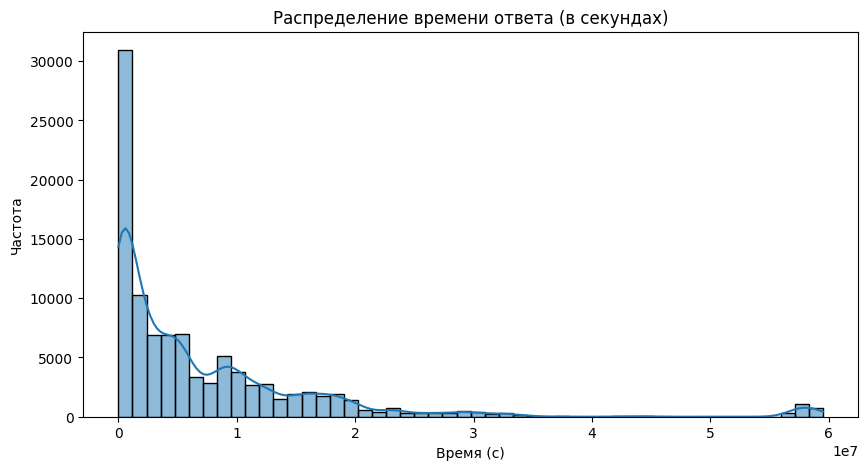

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем миллисекунды в секунды
df_train['timestamp_seconds'] = df_train['timestamp'] / 1000

plt.figure(figsize=(10, 5))
sns.histplot(df_train['timestamp_seconds'], bins=50, kde=True)
plt.title("Распределение времени ответа (в секундах)")
plt.xlabel("Время (с)")
plt.ylabel("Частота")
plt.show()

Распределение правильных ответов (answered_correctly)

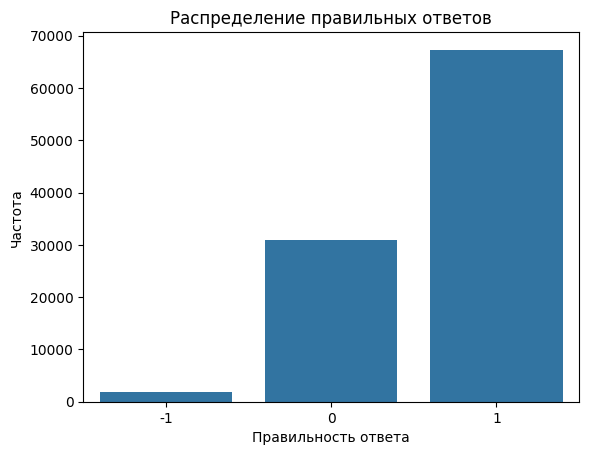

In [17]:
sns.countplot(data=df_train, x='answered_correctly')
plt.title("Распределение правильных ответов")
plt.xlabel("Правильность ответа")
plt.ylabel("Частота")
plt.show()

 Влияние объяснений на результат (prior_question_had_explanation)

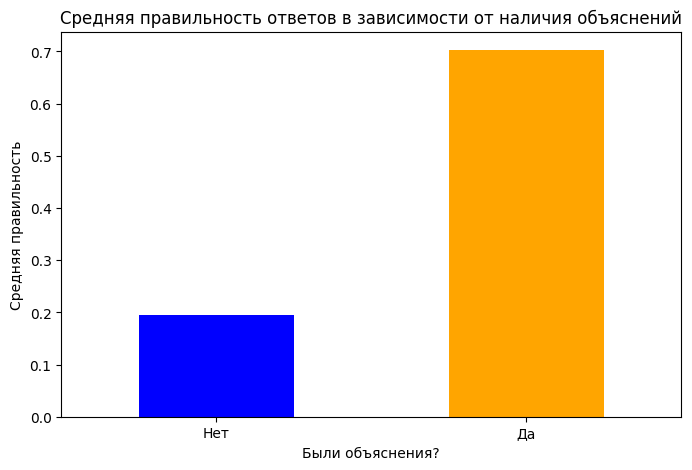

In [19]:
explanation_effect = df_train.groupby('prior_question_had_explanation')['answered_correctly'].mean()
explanation_effect.plot(kind='bar', figsize=(8, 5), color=['blue', 'orange'])
plt.title("Средняя правильность ответов в зависимости от наличия объяснений")
plt.xlabel("Были объяснения?")
plt.ylabel("Средняя правильность")
plt.xticks([0, 1], ['Нет', 'Да'], rotation=0)
plt.show()